# ICAT3210 Applied Machine Learning

## Project work

__Distinguish between the presence and absence of cardiac arrhythmia and classify it in one of the 16 groups.__

Used libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Better looking plots
%matplotlib inline     

Read data from file arrhythmia.data, data is in text form. File needs to be in same folder as this file.

In [2]:
data = pd.read_csv('arrhythmia.data')

In [3]:
data.shape

(451, 280)

Data has 451 rows, which is one less than there should be. Material has 279 attributes and one column for class, so 280 columns together.

In [4]:
data.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


Data is missing attribute labels and one of the instances is taken to be label row.

Let's add labels to file. Labels for attributes are found in arrhythmia.names file.

In [5]:
column_labels = ['Age','Sex','Height','Weight','QRS_duration','PR_interval','QT_interval','T_interval','P_interval','QRS_angle',
                 'T_angle','P_angle','QRST_angle','J_angle','Heart_rate',
                 'Q_wave_DI_Avg_width','R_wave_DI_Avg_width','S_wave_DI_Avg_width','r_wave_DI_Avg_width','s_wave_DI_Avg_width','intrinsic_deflections_DI','ragged_R_DI',
                 'diphasic_der_R_DI','ragged_P_DI','diphasic_der_P_DI','ragged_T_DI','diphasic_der_T_DI',
                 'Q_wave_DII_Avg_width','R_wave_DII_Avg_width','S_wave_DII_Avg_width','r_wave_DII_Avg_width','s_wave_DII_Avg_width','intrinsic_deflections_DII','ragged_R_DII',
                 'diphasic_der_R_DII','ragged_P_DII','diphasic_der_P_DII','ragged_T_DII','diphasic_der_T_DII',
                 'Q_wave_DIII_Avg_width','R_wave_DIII_Avg_width','S_wave_DIII_Avg_width','r_wave_DIII_Avg_width','s_wave_DIII_Avg_width','intrinsic_deflections_DIII','ragged_R_DIII',
                 'diphasic_der_R_DIII','ragged_P_DIII','diphasic_der_P_DIII','ragged_T_DIII','diphasic_der_T_DIII',
                 'Q_wave_AVR_Avg_width','R_wave_AVR_Avg_width','S_wave_AVR_Avg_width','r_wave_AVR_Avg_width','s_wave_AVR_Avg_width','intrinsic_deflections_AVR','ragged_R_AVR',
                 'diphasic_der_R_AVR','ragged_P_AVR','diphasic_der_P_AVR','ragged_T_AVR','diphasic_der_T_AVR',
                 'Q_wave_AVL_Avg_width','R_wave_AVL_Avg_width','S_wave_AVL_Avg_width','r_wave_AVL_Avg_width','s_wave_AVL_Avg_width','intrinsic_deflections_AVL','ragged_R_AVL',
                 'diphasic_der_R_AVL','ragged_P_AVL','diphasic_der_P_AVL','ragged_T_AVL','diphasic_der_T_AVL',
                 'Q_wave_AVF_Avg_width','R_wave_AVF_Avg_width','S_wave_AVF_Avg_width','r_wave_AVF_Avg_width','s_wave_AVF_Avg_width','intrinsic_deflections_AVF','ragged_R_AVF',
                 'diphasic_der_R_AVF','ragged_P_AVF','diphasic_der_P_AVF','ragged_T_AVF','diphasic_der_T_AVF',
                 'Q_wave_V1_Avg_width','R_wave_V1_Avg_width','S_wave_V1_Avg_width','r_wave_V1_Avg_width','s_wave_V1_Avg_width','intrinsic_deflections_V1','ragged_R_V1',
                 'diphasic_der_R_V1','ragged_P_V1','diphasic_der_P_V1','ragged_T_V1','diphasic_der_T_V1',
                 'Q_wave_V2_Avg_width','R_wave_V2_Avg_width','S_wave_V2_Avg_width','r_wave_V2_Avg_width','s_wave_V2_Avg_width','intrinsic_deflections_V2','ragged_R_V2',
                 'diphasic_der_R_V2','ragged_P_V2','diphasic_der_P_V2','ragged_T_V2','diphasic_der_T_V2',
                 'Q_wave_V3_Avg_width','R_wave_V3_Avg_width','S_wave_V3_Avg_width','r_wave_V3_Avg_width','s_wave_V3_Avg_width','intrinsic_deflections_V3','ragged_R_V3',
                 'diphasic_der_R_V3','ragged_P_V3','diphasic_der_P_V3','ragged_T_V3','diphasic_der_T_V3',
                 'Q_wave_V4_Avg_width','R_wave_V4_Avg_width','S_wave_V4_Avg_width','r_wave_V4_Avg_width','s_wave_V4_Avg_width','intrinsic_deflections_V4','ragged_R_V4',
                 'diphasic_der_R_V4','ragged_P_V4','diphasic_der_P_V4','ragged_T_V4','diphasic_der_T_V4',
                 'Q_wave_V5_Avg_width','R_wave_V5_Avg_width','S_wave_V5_Avg_width','r_wave_V5_Avg_width','s_wave_V5_Avg_width','intrinsic_deflections_V5','ragged_R_V5',
                 'diphasic_der_R_V5','ragged_P_V5','diphasic_der_P_V5','ragged_T_V5','diphasic_der_T_V5',
                 'Q_wave_V6_Avg_width','R_wave_V6_Avg_width','S_wave_V6_Avg_width','r_wave_V6_Avg_width','s_wave_V6_Avg_width','intrinsic_deflections_V6','ragged_R_V6',
                 'diphasic_der_R_V6','ragged_P_V6','diphasic_der_P_V6','ragged_T_V6','diphasic_der_T_V6',
                 'JJ_wave_DI_Amp','Q_wave_DI_Amp','R_wave_DI_Amp','S_wave_DI_Amp','r_wave_DI_Amp','s_wave_DI_Amp','P_wave_DI_Amp','T_wave_DI_Amp','QRSA_DI','QRSTA_DI',
                 'JJ_wave_DII_Amp','Q_wave_DII_Amp','R_wave_DII_Amp','S_wave_DII_Amp','r_wave_DII_Amp','s_wave_DII_Amp','P_wave_DII_Amp','T_wave_DII_Amp','QRSA_DII','QRSTA_DII',
                 'JJ_wave_DIII_Amp','Q_wave_DIII_Amp','R_wave_DIII_Amp','S_wave_DIII_Amp','r_wave_DIII_Amp','s_wave_DIII_Amp','P_wave_DIII_Amp','T_wave_DIII_Amp','QRSA_DIII','QRSTA_DIII',
                 'JJ_wave_AVR_Amp','Q_wave_AVR_Amp','R_wave_AVR_Amp','S_wave_AVR_Amp','r_wave_AVR_Amp','s_wave_AVR_Amp','P_wave_AVR_Amp','T_wave_AVR_Amp','QRSA_AVR','QRSTA_AVR',
                 'JJ_wave_AVL_Amp','Q_wave_AVL_Amp','R_wave_AVL_Amp','S_wave_AVL_Amp','r_wave_AVL_Amp','s_wave_AVL_Amp','P_wave_AVL_Amp','T_wave_AVL_Amp','QRSA_AVL','QRSTA_AVL',
                 'JJ_wave_AVF_Amp','Q_wave_AVF_Amp','R_wave_AVF_Amp','S_wave_AVF_Amp','r_wave_AVF_Amp','s_wave_AVF_Amp','P_wave_AVF_Amp','T_wave_AVF_Amp','QRSA_AVF','QRSTA_AVF',
                 'JJ_wave_V1_Amp','Q_wave_V1_Amp','R_wave_V1_Amp','S_wave_V1_Amp','r_wave_V1_Amp','s_wave_V1_Amp','P_wave_V1_Amp','T_wave_V1_Amp','QRSA_V1','QRSTA_V1',
                 'JJ_wave_V2_Amp','Q_wave_V2_Amp','R_wave_V2_Amp','S_wave_V2_Amp','r_wave_V2_Amp','s_wave_V2_Amp','P_wave_V2_Amp','T_wave_V2_Amp','QRSA_V2','QRSTA_V2',
                 'JJ_wave_V3_Amp','Q_wave_V3_Amp','R_wave_V3_Amp','S_wave_V3_Amp','r_wave_V3_Amp','s_wave_V3_Amp','P_wave_V3_Amp','T_wave_V3_Amp','QRSA_V3','QRSTA_V3',
                 'JJ_wave_V4_Amp','Q_wave_V4_Amp','R_wave_V4_Amp','S_wave_V4_Amp','r_wave_V4_Amp','s_wave_V4_Amp','P_wave_V4_Amp','T_wave_V4_Amp','QRSA_V4','QRSTA_V4',
                 'JJ_wave_V5_Amp','Q_wave_V5_Amp','R_wave_V5_Amp','S_wave_V5_Amp','r_wave_V5_Amp','s_wave_V5_Amp','P_wave_V5_Amp','T_wave_V5_Amp','QRSA_V5','QRSTA_V5',
                 'JJ_wave_V6_Amp','Q_wave_V6_Amp','R_wave_V6_Amp','S_wave_V6_Amp','r_wave_V6_Amp','s_wave_V6_Amp','P_wave_V6_Amp','T_wave_V6_Amp','QRSA_V6','QRSTA_V6',
                 'Class']
     
     

Labels can to be combined to arrhythmia.data file data when data is read to Pandas dataframe.

Data from arrhythmia.data is read without header to data dataframe.

In [6]:
data = pd.read_csv('arrhythmia.data', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Labels are added to dataframe data.

In [7]:
data.columns = column_labels

In [8]:
data.head()

,Age,Sex,Height,Weight,QRS_duration,PR_interval,QT_interval,T_interval,P_interval,QRS_angle,...,Q_wave_V6_Amp,R_wave_V6_Amp,S_wave_V6_Amp,r_wave_V6_Amp,s_wave_V6_Amp,P_wave_V6_Amp,T_wave_V6_Amp,QRSA_V6,QRSTA_V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [9]:
data.shape

(452, 280)

Now all instances and attributes are read correctly, like they are in the original data.

In [10]:
data.describe()

,Age,Sex,Height,Weight,QRS_duration,PR_interval,QT_interval,T_interval,P_interval,QRS_angle,...,Q_wave_V6_Amp,R_wave_V6_Amp,S_wave_V6_Amp,r_wave_V6_Amp,s_wave_V6_Amp,P_wave_V6_Amp,T_wave_V6_Amp,QRSA_V6,QRSTA_V6,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


Let's check if there any columns contain any NaN values in dataframe.

In [11]:
data.iloc[:, :].isnull().sum()

Age              0
Sex              0
Height           0
Weight           0
QRS_duration     0
                ..
P_wave_V6_Amp    0
T_wave_V6_Amp    0
QRSA_V6          0
QRSTA_V6         0
Class            0
Length: 280, dtype: int64

To see all values it can be changed to list

In [12]:
data.iloc[:, :].isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


None of the columns have any NaN values. That is not true. In the arrhythmia.names it was said that there are missing values. They are marked with ?.

For example there are question marks in J_angle column.

In [13]:
data.loc[:,'J_angle']

0        ?
1        ?
2       23
3        ?
4        ?
      ... 
447      ?
448      ?
449     84
450    103
451      ?
Name: J_angle, Length: 452, dtype: object

Data type of the first element of the J_angle column (?) can be checked.

In [14]:
print(type(data.loc[0, 'J_angle']))

<class 'str'>


Data type of the first element of the J_angle column is string.
How about numbers in the same column.

In [15]:
print(type(data.loc[2, 'J_angle']))

<class 'str'>


That is also string data type. 
Question marks have to converted to NaN and numbers to float. NaN is float type in pandas.

All columns will be check and all rows in those columns will be check if there are any question marks or numbers that are string type. Question marks will be converted to NaN and numbers that are string type will be converted to float type numbers. 

In [16]:
changed = []
for column in data:                                                    # All columns are checked
    if type(data.at[1, column]) == str:                                # Check if the first element of the column is string
        for index in data.index:                                       # All rows are checked       
            if data.at[index, column] == '?':                          # If value is ?
                data.at[index, column] = np.nan                        # Replace ? values with NaN
            else:
                data.at[index, column] = float(data.at[index, column]) # Convert string type numbers to float                                                 
        changed.append([column, data.columns.get_loc(column)])
print(changed)                                                         # Print column names and number that are changed

[['T_angle', 10], ['P_angle', 11], ['QRST_angle', 12], ['J_angle', 13], ['Heart_rate', 14]]


How many NaN there can be found in these columns.

In [17]:
data.loc[:, ['T_angle','P_angle','QRST_angle','J_angle','Heart_rate']].isnull().sum()

T_angle         8
P_angle        22
QRST_angle      1
J_angle       376
Heart_rate      1
dtype: int64

Column J_angle is missing 376 values out of 452. That column can be removed from dataframe.

In [18]:
data = data.drop('J_angle', axis = 1)

Dataframe size after J_angle is removed.

In [19]:
data.shape

(452, 279)

NaN values left

In [20]:
data.loc[:, ['T_angle','P_angle','QRST_angle','Heart_rate']].isnull().sum()

T_angle        8
P_angle       22
QRST_angle     1
Heart_rate     1
dtype: int64

Check if missing values are in same rows.

In [21]:
data.loc[data['T_angle'].isna(), ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
66,NaN,62.0,39.0,54.0
91,NaN,64.0,-1.0,85.0
200,NaN,30.0,2.0,89.0
212,NaN,2.0,16.0,59.0
238,NaN,56.0,20.0,79.0
360,NaN,42.0,53.0,87.0
372,NaN,56.0,44.0,89.0
412,NaN,-52.0,62.0,63.0


In [22]:
data.loc[data['P_angle'].isna(), ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
54,79.0,NaN,62.0,59.0
59,53.0,NaN,76.0,66.0
106,70.0,NaN,12.0,63.0
108,-92.0,NaN,92.0,86.0
116,23.0,NaN,42.0,61.0
133,32.0,NaN,53.0,63.0
174,73.0,NaN,76.0,71.0
177,19.0,NaN,49.0,67.0
193,-82.0,NaN,19.0,84.0
204,102.0,NaN,96.0,70.0


In [23]:
data.loc[data['QRST_angle'].isna(), ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
241,-177.0,26.0,NaN,89.0


In [24]:
data.loc[data['Heart_rate'].isna(), ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
4,13.0,61.0,3.0,NaN


All remaining missing values are in different rows.

NaN values in QRST_angle and Heart_rate are replaced with column averages.

In [25]:
print('QRST_angle mean value is ' + str(data['QRST_angle'].mean()))
print('Heart_rate mean value is ' + str(data['Heart_rate'].mean()))

QRST_angle mean value is 36.71618625277162
Heart_rate mean value is 74.46341463414635


Replace all NaN values in QRST_angle column with the QRST_angle column average.

In [26]:
data['QRST_angle'] = data['QRST_angle'].fillna(value = data['QRST_angle'].mean())

In [27]:
data.loc[[241], ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
241,-177.0,26.0,36.716186,89.0


Replace all NaN values in Heart_rate column with the Heart_rate column average.

In [28]:
data['Heart_rate'] = data['Heart_rate'].fillna(value = data['Heart_rate'].mean())

In [29]:
data.loc[[4], ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
4,13.0,61.0,3.0,74.463415


NaN values left in columns T_angle and P_angle.

In [30]:
data.loc[:, ['T_angle', 'P_angle','QRST_angle','Heart_rate']].isnull().sum()

T_angle        8
P_angle       22
QRST_angle     0
Heart_rate     0
dtype: int64

NaN values in T_angle and P_angle columns are also replaced with column averages.

In [31]:
print('T_angle mean value is ' + str(data['T_angle'].mean()))
print('P_angle mean value is ' + str(data['P_angle'].mean()))

T_angle mean value is 36.1509009009009
P_angle mean value is 48.913953488372094


Replace all NaN values in column with the column average.

In [32]:
data['T_angle'] = data['T_angle'].fillna(value = data['T_angle'].mean())
data['P_angle'] = data['P_angle'].fillna(value = data['P_angle'].mean())

In [33]:
data.loc[[66,91,200,212,238,360,372,412], ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
66,36.150901,62.0,39.0,54.0
91,36.150901,64.0,-1.0,85.0
200,36.150901,30.0,2.0,89.0
212,36.150901,2.0,16.0,59.0
238,36.150901,56.0,20.0,79.0
360,36.150901,42.0,53.0,87.0
372,36.150901,56.0,44.0,89.0
412,36.150901,-52.0,62.0,63.0


In [34]:
data.loc[[54,59,106,108,116,133,174,177,193,204,217,219,243,253,279,284,298,300,308,310,350,420], ['T_angle', 'P_angle','QRST_angle','Heart_rate']]

,T_angle,P_angle,QRST_angle,Heart_rate
54,79.0,48.913953,62.0,59.0
59,53.0,48.913953,76.0,66.0
106,70.0,48.913953,12.0,63.0
108,-92.0,48.913953,92.0,86.0
116,23.0,48.913953,42.0,61.0
133,32.0,48.913953,53.0,63.0
174,73.0,48.913953,76.0,71.0
177,19.0,48.913953,49.0,67.0
193,-82.0,48.913953,19.0,84.0
204,102.0,48.913953,96.0,70.0


Dataframe cleanign is done.

In [35]:
data.describe()

,Age,Sex,Height,Weight,QRS_duration,PR_interval,QT_interval,T_interval,P_interval,QRS_angle,...,Q_wave_V6_Amp,R_wave_V6_Amp,S_wave_V6_Amp,r_wave_V6_Amp,s_wave_V6_Amp,P_wave_V6_Amp,T_wave_V6_Amp,QRSA_V6,QRSTA_V6,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [36]:
data.groupby('Class').mean()

,Age,Sex,Height,Weight,QRS_duration,PR_interval,QT_interval,T_interval,P_interval,QRS_angle,...,JJ_wave_V6_Amp,Q_wave_V6_Amp,R_wave_V6_Amp,S_wave_V6_Amp,r_wave_V6_Amp,s_wave_V6_Amp,P_wave_V6_Amp,T_wave_V6_Amp,QRSA_V6,QRSTA_V6
Class,,,,,,,,,,,,,,,,,,,,,
1,46.273469,0.653061,164.102041,68.669388,84.277551,157.216327,367.200000,162.918367,92.232653,36.787755,...,-0.215918,-0.193469,9.235510,-1.245714,0.005306,0.0,0.522857,1.597959e+00,20.311429,33.836735
2,51.750000,0.590909,163.068182,73.363636,89.818182,153.022727,369.568182,190.704545,87.454545,29.954545,...,-0.765909,-0.238636,9.718182,-1.902273,0.000000,0.0,0.534091,-6.000000e-01,20.313636,13.795455
3,53.333333,0.000000,170.600000,76.866667,93.333333,163.200000,355.466667,201.800000,98.400000,17.400000,...,-0.060000,-0.533333,5.646667,-1.866667,0.000000,0.0,0.653333,4.666667e-01,7.466667,11.993333
4,57.266667,0.266667,166.000000,73.866667,89.866667,160.400000,352.133333,170.000000,94.000000,6.600000,...,-0.186667,-0.946667,6.253333,-0.680000,0.033333,0.0,0.693333,1.200000e-01,11.713333,12.206667
5,30.846154,0.692308,233.615385,44.615385,88.000000,158.230769,298.076923,154.000000,85.769231,47.076923,...,0.138462,-0.315385,6.761538,-3.253846,0.000000,0.0,0.607692,1.476923e+00,4.876923,15.646154
6,47.920000,0.440000,165.040000,68.000000,83.160000,157.960000,393.240000,152.880000,80.000000,28.240000,...,-0.388000,-0.152000,8.744000,-0.664000,0.000000,0.0,0.404000,1.560000e+00,21.624000,33.804000
7,60.666667,0.000000,178.000000,73.000000,96.333333,190.666667,365.333333,185.333333,98.000000,3.666667,...,-0.433333,-0.333333,11.200000,-1.733333,0.000000,0.0,0.100000,1.400000e+00,22.466667,33.133333
8,71.000000,0.000000,176.500000,79.000000,98.500000,183.000000,368.000000,185.000000,101.500000,-44.500000,...,0.100000,0.000000,6.600000,-3.650000,0.000000,0.0,0.650000,1.850000e+00,5.650000,23.650000
9,58.222222,0.555556,155.666667,66.444444,154.444444,158.444444,439.444444,263.666667,90.333333,12.777778,...,-2.066667,0.000000,8.933333,-0.733333,0.000000,0.0,0.488889,-1.733333e+00,52.877778,31.055556


In last column 'Class' are the correct class values, 1 to 16.

## Feature Selection

### Feature Importance

This method gives a score for each feature of the data. Higher the score, more relevant or important is the feature towards the output variable.

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot as plt

In [38]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [39]:
df1 = X; df2 = X; df3 = X; df4 = X; df5 = X
y1 = y; y2 = y; y3 = y; y4 = y; y5 = y
X_frames = [df1, df2, df3, df4, df5]
y_frames = [y1, y2, y3, y4, y5]
X_con = pd.concat(X_frames)
y_con = pd.concat(y_frames)
X_con.shape, y_con.shape

((2260, 278), (2260,))

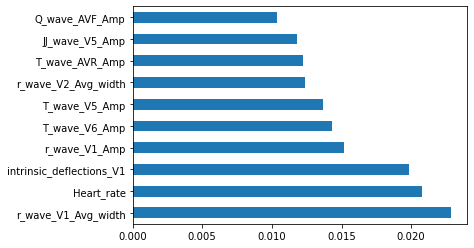

In [40]:
model = ExtraTreesClassifier()
model.fit(X_con,y_con)
feat_importances = pd.Series(model.feature_importances_, index=X_con.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Recursive Feature Elimination

Recursively removes attributes and builds model on those attributes that remain.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [42]:
cols = list(X.columns)
RFE_model = LinearRegression()

#Initializing RFE model
rfe = RFE(RFE_model, n_features_to_select=10)    

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_con,y_con) 

#Fitting the data to model
RFE_model.fit(X_rfe,y_con)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['ragged_P_AVR', 'ragged_T_AVL', 'diphasic_der_P_AVF',
       'diphasic_der_R_V1', 'diphasic_der_P_V2', 'ragged_T_V2',
       'diphasic_der_P_V3', 'diphasic_der_P_V5', 'r_wave_DI_Amp',
       's_wave_V4_Amp'],
      dtype='object')


### Univariate Selection

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [44]:
best_feat = SelectKBest(score_func=mutual_info_classif, k=4)
fit = best_feat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs     Score
13            Heart_rate  0.283178
112  S_wave_V3_Avg_width  0.248753
195       T_wave_AVR_Amp  0.246706
275        T_wave_V6_Amp  0.219398
226              QRSA_V1  0.218197
88   S_wave_V1_Avg_width  0.214435
100  S_wave_V2_Avg_width  0.200018
10               T_angle  0.190163
175       T_wave_DII_Amp  0.189638
165        T_wave_DI_Amp  0.187169


### Random Forest Classifier

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_con, y_con, 
                                                   test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((1582, 278), (678, 278))

In [47]:
max_depth = [2,3,5,10,20]
n_estimators = [10,25,30,50,100,200]
min_samples_leaf = [5,10,20,50,100,200]
oob_score = 0
dpth = 0
estimator = 0
sample_leaf = 0
for depth in max_depth:
    for leaf in min_samples_leaf:
        for est in n_estimators:
            rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=depth, min_samples_leaf=leaf, n_estimators=est, oob_score=True)
            rf_classifier.fit(X_train, y_train)
            if rf_classifier.oob_score_ > oob_score:
                dpth = depth
                estimator = est
                sample_leaf = leaf
                oob_score = rf_classifier.oob_score_

print('max_depth: {}; min_samples_leaf: {}; n_estimators: {}, oob_score: {}'.format(dpth, sample_leaf, estimator, oob_score))

C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were 

C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\samio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were 

max_depth: 20; min_samples_leaf: 5; n_estimators: 100, oob_score: 0.9627054361567636


In [48]:
rf_best = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20, min_samples_leaf=5, n_estimators=100, oob_score=True)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

In [49]:
y_pred = rf_best.predict(X_test)

In [50]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9646017699115044


### Feature Importance

This method gives a score for each feature of the data. Higher the score, more relevant or important is the feature towards the output variable.

In [51]:
z_score = []
mean = rf_best.feature_importances_.mean()
std = rf_best.feature_importances_.std()
for i in range(len(rf_best.feature_importances_)):
    z_score.append((rf_best.feature_importances_[i] - mean)/std)

In [52]:
import numpy as np
z_scr = np.array(z_score)

In [53]:
imp_df = pd.DataFrame({"Feature": X_train.columns,
                      "Score": z_scr})
feat_ext = imp_df.sort_values(by="Score", ascending=False)

## Feature Extraction

Based on z-score values obtained after classifying the data using Random Forest Classification, we sort (descending) the features according to their z-score values and choose those with positive values for building the model.

In [54]:
data_fe = data[feat_ext.iloc[:,0][0:10]]

In [55]:
data_fe.head()

,Heart_rate,r_wave_V1_Amp,T_wave_V6_Amp,T_wave_AVR_Amp,r_wave_V1_Avg_width,T_wave_V5_Amp,intrinsic_deflections_V1,T_wave_DII_Amp,QRSA_V1,QT_interval
0,63.000000,0.0,2.9,-1.7,0,3.9,0,1.5,-24.0,371
1,53.000000,0.0,2.1,-1.6,0,2.6,16,1.7,-21.6,401
2,75.000000,6.5,3.4,-2.5,76,3.4,100,2.7,18.7,386
3,71.000000,0.0,2.6,-1.7,0,3.0,0,1.5,-18.2,380
4,74.463415,0.0,3.9,-1.5,0,2.9,0,1.7,-25.0,360


# Model Construction


In [56]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import neighbors

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm, metrics

import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data_fe, y,test_size=0.25)

## K-Nearest Neighbours


In [58]:
n_neighbors=5

start_time_knn = time.time()
predictor_knn=Pipeline([('Scaling', StandardScaler()),('KNN', neighbors.KNeighborsClassifier(n_neighbors,weights='distance'))])
predictor_knn.fit(X_train,y_train)
end_time_knn= (time.time() - start_time_knn)

start_time2_knn = time.time()
yh_knn=predictor_knn.predict(X_train)
end_time2_knn= (time.time() - start_time2_knn)

yh_test_knn=predictor_knn.predict(X_test)

In [59]:
cv_score_knn= cross_val_score(predictor_knn,X_test, y_test).mean()
test_score_knn= metrics.accuracy_score(y_true=y_test, y_pred=yh_test_knn) 
train_score_knn= metrics.accuracy_score(y_true=y_train, y_pred=yh_knn)


print("Training Time is %s seconds " , end_time_knn)
print("Prediction Time id %s seconds ", end_time2_knn)
print("Prediction accuracy in training set is", train_score_knn)
print("Prediction accuracy in testing set is", test_score_knn)
print("Prediction accuracy in cv is          ", cv_score_knn)

#there is a warning about an unpopulated class, but we can't really do something about it since it is linked to the data

Training Time is %s seconds  0.0050013065338134766
Prediction Time id %s seconds  0.004999876022338867
Prediction accuracy in training set is 1.0
Prediction accuracy in testing set is 0.5929203539823009
Prediction accuracy in cv is           0.575098814229249


C:\Users\samio\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


##Linear regression

In [60]:
start_time_lin = time.time()
predictor_lin=ElasticNet(alpha=0.2, l1_ratio=1)
#predictor_lin = svm.SVC(kernel='linear')
#predictor_lin = GradientBoostingRegressor(n_estimators=150)
predictor_lin.fit(X_train,y_train)
end_time_lin= (time.time() - start_time_lin)

start_time2_lin = time.time()
yh_lin=predictor_lin.predict(X_train)
end_time2_lin= (time.time() - start_time_lin)

yh_test_lin =predictor_lin.predict(X_test)

In [61]:
cv_score_lin= cross_val_score(predictor_lin,X_test, y_test).mean()
test_score_lin= metrics.r2_score(y_true=y_test, y_pred=yh_test_lin) 
train_score_lin= metrics.r2_score(y_true=y_train, y_pred=yh_lin)


print("Training Time is %s seconds " , end_time_lin)
print("Prediction Time id %s seconds ",end_time2_lin)
print("Prediction accuracy in training set is", train_score_lin)
print("Prediction accuracy in testing set is", test_score_lin)
print("Prediction accuracy in cv is          ", cv_score_lin)

Training Time is %s seconds  0.0040073394775390625
Prediction Time id %s seconds  0.0050067901611328125
Prediction accuracy in training set is 0.18582516324506992
Prediction accuracy in testing set is 0.15476946120205148
Prediction accuracy in cv is           -0.14392083501001895


##Neural Networks 

###MPL Regressor

In [62]:
start_time_mlp = time.time()
predictor_mlp = MLPRegressor(hidden_layer_sizes=(30,15),activation='relu', solver='lbfgs',early_stopping=True,max_iter=10000)
predictor_mlp.fit(X=X_train, y=y_train)
end_time_mlp= (time.time() - start_time_mlp)

start_time2_mlp = time.time()
yh_mlp = predictor_mlp.predict(X_train)
end_time2_mlp = (time.time() - start_time2_mlp)

yh_test_mlp = predictor_mlp.predict(X_test)

In [63]:
cv_score_mlp = cross_val_score(predictor_mlp,X_test, y_test).mean()
test_score_mlp= metrics.r2_score(y_true=y_test, y_pred=yh_test_mlp) 
train_score_mlp = metrics.r2_score(y_true=y_train, y_pred=yh_mlp)


print("Training Time is in seconds " , end_time_mlp)
print("Prediction Time is in seconds ",end_time2_mlp)
print("Prediction accuracy in training set is", train_score_mlp)
print("Prediction accuracy in testing set is", test_score_mlp)
print("Prediction accuracy in cv is          ", cv_score_mlp)

Training Time is in seconds  0.33438897132873535
Prediction Time is in seconds  0.0009996891021728516
Prediction accuracy in training set is 0.3104705270095738
Prediction accuracy in testing set is 0.13791275847920226
Prediction accuracy in cv is           -1.1515958998067073


###ExtraTreeRegressor

In [64]:
start_time_etr = time.time()
predictor_etr = ExtraTreesRegressor(n_estimators=250,max_depth=4)
predictor_etr.fit(X=X_train, y=y_train)
end_time_etr= (time.time() - start_time_etr)

start_time2_etr = time.time()
yh_etr = predictor_etr.predict(X_train)
end_time2_etr= (time.time() - start_time2_etr)

yh_test_etr = predictor_etr.predict(X_test)

In [65]:
cv_score_etr= cross_val_score(predictor_etr,X_test, y_test).mean()
test_score_etr= metrics.r2_score(y_true=y_test, y_pred=yh_test_etr) 
train_score_etr= metrics.r2_score(y_true=y_train, y_pred=yh_etr)


print("Training Time is %s seconds " , end_time_etr)
print("Prediction Time id %s seconds ",end_time2_etr)
print("Prediction accuracy in training set is", train_score_etr)
print("Prediction accuracy in testing set is", test_score_etr)
print("Prediction accuracy in cv is          ", cv_score_etr)

Training Time is %s seconds  0.16413307189941406
Prediction Time id %s seconds  0.014044523239135742
Prediction accuracy in training set is 0.295864257132023
Prediction accuracy in testing set is 0.17385144163887867
Prediction accuracy in cv is           -0.08245509284290883


# Model validation and visualization

Out of several models the k-Nearest Neighbour was selected as it produced the highest accuracy. The model performance can be evaluated with confusion matrix and different scores.

In [66]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import LeaveOneOut as LOO
from sklearn.model_selection import KFold


#Confusion matrix
CM = confusion_matrix(y_true = y_train, y_pred = yh_knn)
print(CM)

#Training set accuracy
training_set_acc = predictor_knn.score(X_train, y_train)
#Hold-out set accuracy
test_set_acc = predictor_knn.score(X_test, y_test)
#Cross-validation
cv_score_val = cross_val_score(predictor_knn, X_test, y_test).mean()
#Leave-one-out cross validation
loocv = LOO()
cv_score_loo_val = cross_val_score(predictor_knn, X_test, y_test, cv=loocv).mean()
#KFold
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
cv_score_kfold_val = cross_val_score(predictor_knn, X_test, y_test, cv=kfold).mean()

print('Accuracies for k-Nearest Neighbour model.')
print("Prediction accuracy in training set is", training_set_acc)
print("Prediction accuracy in testing set is", test_set_acc)
print("Prediction accuracy in cross-validation is", cv_score_val)
print("Prediction accuracy in leave-one-out cross-validation is", cv_score_loo_val)
print("Prediction accuracy in K-fold cross-validation is", cv_score_kfold_val)

[[193   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  28   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  21   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  36   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16]]


C:\Users\samio\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracies for k-Nearest Neighbour model.
Prediction accuracy in training set is 1.0
Prediction accuracy in testing set is 0.5929203539823009
Prediction accuracy in cross-validation is 0.575098814229249
Prediction accuracy in leave-one-out cross-validation is 0.5663716814159292
Prediction accuracy in K-fold cross-validation is 0.5681818181818181


In [67]:
#Project the data so that it can be used for visualization
from sklearn.manifold import TSNE

tsneData = TSNE(n_components = 2, init = 'random').fit_transform(X_train)
X_visual = tsneData[:,0]
y_visual = tsneData[:,1]


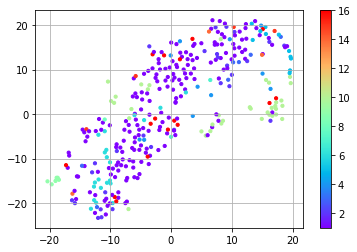

In [68]:
#Scatter plot
plt.scatter(X_visual, y_visual, c=yh_knn, cmap = 'rainbow', s=10)
plt.colorbar()
plt.grid(True)

C:\Users\samio\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\samio\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


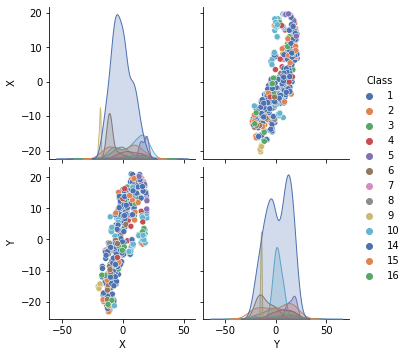

In [69]:
#Turning result and projection into a dataframe to work with Seaborn
df_visual = pd. DataFrame(tsneData, columns=['X', 'Y'])
df_visual['Class'] = yh_knn.tolist()
#Scatterplot matrix
sns.pairplot(df_visual, hue='Class', palette='deep')

<AxesSubplot:xlabel='X', ylabel='Y'>

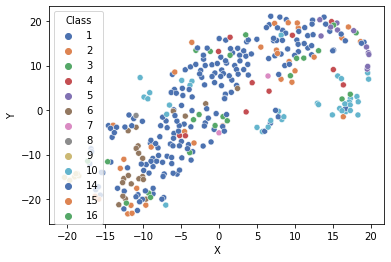

In [70]:
#Seaborn scatterplot, for comparison and whatnot

sns.scatterplot(data=df_visual, x='X', y='Y', hue='Class', palette = 'deep', sizes='Class')
